In [1]:
from __future__ import print_function

#MSPA PREDICT 400

##Final Exam

###Question 1

A local copy center needs to buy white paper and yellow paper.  They can buy from three suppliers.  Supplier 1 sells a package of 20 reams of white and 10 reams of yellow for \$60.  Supplier 2 sells a package of 10 reams of white and 10 reams of yellow for \$40.  Supplier 3 sells a package of 10 reams of white and 20 reams of yellow for \$50.  The copy center needs 350 reams of white and 400 reams of yellow.  Using Python, determine (1) how many packages they should buy from each supplier in order to minimize cost and (2) the minimum cost.

####Answer

To answer this question, a set of constraints and objective function must be derived. Constraints are shown below:

$w_1 \ge 350$ : minimum 350 reams of white paper

$y_1 \ge 400$ : minimum 400 reams of yellow paper

$p_1 \ge 0$ : minimum zero packages from Supplier 1

$p_2 \ge 0$ : minimum zero packages from Supplier 2

$p_3 \ge 0$ : minimum zero packages from Supplier 3

where:

$w_1$ represents the amount of reams of white paper

$y_2$ represents the amount of reams of yellow paper

$p_1$ represents the amount packages from Supplier 1

$p_2$ represents the amount packages from Supplier 2

$p_3$ represents the amount packages from Supplier 3

Functions for total reams of white and yellow paper are shown below:

$w_1 = 20p_1 + 10p_2 + 10p_3$ : 20 reams of white paper from Supplier 1, 10 from Supplier 2 and 10 from Supplier 3

$y_1 = 10p_1 + 10p_2 + 20p_3$ : 10 reams of yellow paper from Supplier 1, 10 from Supplier 2 and 20 from Supplier 3

The objective function (to be minimized) is shown below:

$min(60p_1 + 40p_2 + 50p_3)$

which pays respect to minimizing total cost of purchasing the packages for paper reams.


The above linear optimization problem can be solved using the 'pulp' package in Python.

In [2]:
from pulp import *
 
# declare variables
w1 = LpVariable("w1", 350, 99999) # minimum 350 reams of white paper
y1 = LpVariable("y1", 400, 99999) # minimum 400 reams of yellow paper
p1 = LpVariable("p1", 0, 99999) # minimum zero packages from Supplier 1
p2 = LpVariable("p2", 0, 99999) # minimum zero packages from Supplier 2
p3 = LpVariable("p3", 0, 99999) # minimum zero packages from Supplier 3

# define problem
prob = LpProblem("problem", LpMinimize)

# define constraints
prob += p1*20 + p2*10 + p3*10 == w1 # 20 reams of white paper from Supplier 1, 10 from Supplier 2 and 10 from Supplier 3
prob += p1*10 + p2*10 + p3*20 == y1 # 10 reams of yellow paper from Supplier 1, 10 from Supplier 2 and 20 from Supplier 3

# define objective function
prob += p1*60 + p2*40 + p3*50 # minimizing total cost of purchasing the packages for paper reams.

# solve problem
prob.solve(solver = GLPK("C:\\Program Files\\glpk-4.57\\w64\\glpsol.exe"))

p1 = round(value(p1),0)
p2 = round(value(p2),0)
p3 = round(value(p3),0)

print("Packages ordered from Supplier 1 (no.):", p1)
print("Packages ordered from Supplier 2 (no.):", p2)
print("Packages ordered from Supplier 3 (no.):", p3)

tc = p1*60 + p2*40 + p3*50

print("Total cost of purchasing packages ($):", tc)

Packages ordered from Supplier 1 (no.): 10.0
Packages ordered from Supplier 2 (no.): 0.0
Packages ordered from Supplier 3 (no.): 15.0
Total cost of purchasing packages ($): 1350.0


###Question 2

A new test has been developed to detect a particular type of cancer.  A medical researcher selects a random sample of 1,000 adults and finds (by other means) that 4% have this type of cancer.  Each of the 1,000 adults is given the new test and it is found that the test indicates cancer in 99% of those who have it and in 1% of those who do not.  Based on these results, what is the probability of a randomly chosen person having cancer given that the test indicates cancer?  What is the probability of a person having cancer given that the test does not indicate cancer?

####Answer

This problem can be solved by employing Bayes' Rule. Please see the full set of calculations below.

In [3]:
p_cancer = 0.04 # P(cancer)
p_nocancer = 1 - p_cancer # P(no cancer)
p_pos_cancer = 0.99 # P(positive|cancer)
p_pos_nocancer = 1 - p_pos_cancer # P(positive|no cancer)
p_neg_cancer = p_pos_nocancer # P(negative|cancer)

p_pos = (p_cancer * p_pos_cancer) + (p_nocancer * p_pos_nocancer)

#P(cancer|positive) = P(cancer) * P(positive|cancer) / 
                    #(P(cancer) * P(positive|cancer) + P(no cancer) * P(positive|no cancer))
p_cancer_pos = (p_cancer * p_pos_cancer) / p_pos

#P(cancer|negative = P(cancer) * P(negative|cancer) / 
                    #(P(cancer) * P(negative|cancer) + P(no cancer) * P(negative|no cancer))
p_cancer_neg = (p_cancer * p_neg_cancer) / (1 - p_pos)

print("P(cancer|positive):", format(p_cancer_pos, ".6f"))
print("P(cancer|negative):", format(p_cancer_neg, ".6f"))

P(cancer|positive): 0.804878
P(cancer|negative): 0.000421


###Question 3

If a tank holds 5000 gallons of water, which drains from the bottom of the tank in 40 minutes, then the volume of the water remaining in the tank after t minutes is given by $V(t)=5000(1-\frac{t}{40})^2$, $0≤t≤40$.  Using Python, determine the rate at which water is draining from the tank. 

####Answer

A plot of the amount of water in the tank versus time is shown below.

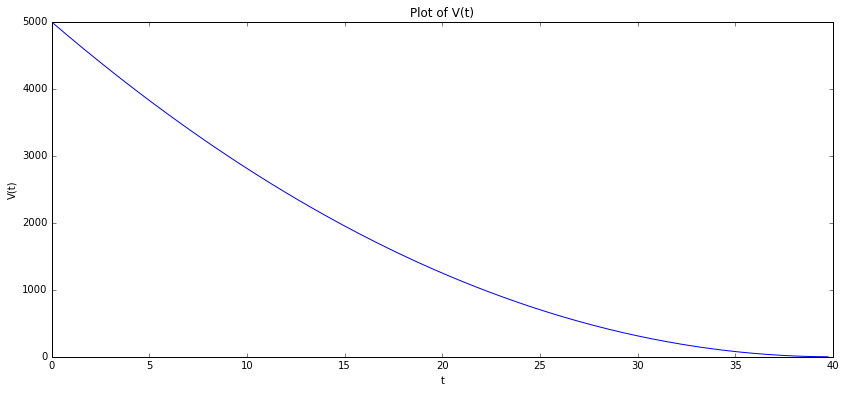

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    y = 5000*(1 - x/40)**2
    return y

x = np.arange(0,40,0.25)
y = f(x)

plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.xlim(0,40)
plt.ylim(0,5000)
plt.title("Plot of V(t)")
plt.ylabel("V(t)")
plt.xlabel("t")
plt.show()

In order to find the rate at which water is draining from the tank, the first derivative of the function $V(t)$ must be found w.r.t time $t$.

In [5]:
from sympy import *

t = Symbol("t")
v = 5000*(1 - t/40)**2
v_d_1 = v.diff(t)
print("d_1(V(t)):", v_d_1)

d_1(V(t)): 25*t/4 - 250


Below is a plot of the rate at which water is draining from the tank over time, according to the first derivative of the function $V(t)$.

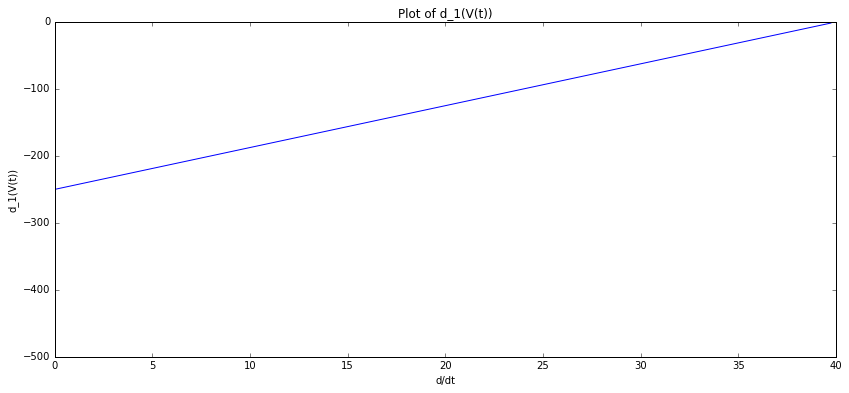

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def d_1(x):
    y = float(25)*x/4 - 250
    return y

x = np.arange(0,40,0.25)
y = d_1(x)

plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.xlim(0,40)
plt.ylim(-500,0)
plt.title("Plot of d_1(V(t))")
plt.ylabel("d_1(V(t))")
plt.xlabel("d/dt")
plt.show()

As it can be seen in the plot above. The rate at which water is draining is greatest at the first interval. The rate of drainage then decreases linearly (in absolute terms). A number of rates of drainage are shown below.

In [7]:
from sympy import *

t = Symbol("t")
v_d_1 = 25*t/4 - 250
print("Rate of drainage (t=5) (gal/min):", v_d_1.subs(t, 5))
print("Rate of drainage (t=10) (gal/min):", v_d_1.subs(t, 10))
print("Rate of drainage (t=20) (gal/min):", v_d_1.subs(t, 20))
print("Rate of drainage (t=40) (gal/min):", v_d_1.subs(t, 40))

Rate of drainage (t=5) (gal/min): -875/4
Rate of drainage (t=10) (gal/min): -375/2
Rate of drainage (t=20) (gal/min): -125
Rate of drainage (t=40) (gal/min): 0


###Question 4

A rectangular container with a volume of 475 ft^3 is to be constructed with a square base and top.  The cost per square foot for the bottom is \$0.20, for the top is \$0.10, and for the sides is \$0.015.  Find the dimensions of the container that minimize the amount of material used.

####Answer

To answer this question, a set of constraints and objective function must be derived. Constraints are shown below:

$l_1 \ge 0$ : minimum zero feet of length for the container

$b_1 \ge 0$ : minimum zero feet of breadth for the container

$h_1 \ge 0$ : minimum zero feet of height for the container

$l_1 \cdot b_1 \cdot h_1 = 475$ : total 475 ft^3 volume for the container

where:

$l_1$ represents the length of the container in feet

$b_1$ represents the breadth of the container in feet

$h_1$ represents the height of the container in feet

Construction of each face of the container has a different cost. Cost equations for each face are shown below:

$cb_1 = 0.2 (l_1 \cdot b_1)$ : $0.20 per square foot to construct the bottom of the container

$ct_1 = 0.1 (l_1 \cdot b_1)$ : $0.10 per square foot to construct the top of the container

$cs_1 = 0.015 (2(l_1 \cdot h_1) + 2(b_1 \cdot h_1))$ : $0.015 per square foot to construct the sides of the container

where:

$cb_1$ represents the total cost of constructing the bottom of the container in dollars

$ct_1$ represents the total cost of constructing the top of the container in dollars

$cs_1$ represents the total cost of constructing the sides of the container in dollars

The objective function is shown below:

$min(cb_1 + ct_1 + cs_1)$

which pays respect to minimizing the total cost of constructing the container.

The above optimization problem can be solved using the 'apm' package in Python.

In [8]:
from apm import *

server = "http://xps.apmonitor.com"
app = "eqn"

apm(server,app, "clear all")
apm_load(server,app, "apm_q4.apm") # Variables passed to apm calculation server (see below):

#Model
#  Variables
#	l[1] = 0, >=0, <=9999
#	b[1] = 0, >=0, <=9999
#	h[1] = 0, >=0, <=9999
#	cb[1] = 0, >=0, <=9999
#	ct[1] = 0, >=0, <=9999
#	cs[1] = 0, >=0, <=9999
#  End Variables
#
#  Equations
#	l[1] * b[1] * h[1] = 475
#	cb[1] = 0.2*(l[1] * b[1])
#	ct[1] = 0.1*(l[1] * b[1])
#	cs[1] = 0.015*(2*(l[1] * h[1]) + 2*(b[1] * h[1]))
#
#	minimize  cb[1] + ct[1] + cs[1]
#  End Equations
#End Model

apm_option(server,app, "nlc.solver", 3) # Select solver (1=APOPT, 2=BPOPT, 3=IPOPT)
solver_output = apm(server,app, "solve") 
results = apm_sol(server,app)

#print(results)
#{'cb[1]': 2.623166, 'ct[1]': 1.311583, 'b[1]': 3.621578, 'h[1]': 36.21578, 'cs[1]': 7.869497, 'l[1]': 3.621578}

l = results["l[1]"]
b = results["b[1]"]
h = results["h[1]"]
v = l * b * h

cb = results["cb[1]"]
ct = results["ct[1]"]
cs = results["cs[1]"]
tc = cb + ct + cs

print("Length of the container (feet):", l)
print("Breadth of the container (feet):", b)
print("Height of the container (feet):", h)
print("Volume of the container (ft^3):", v)
print("Total cost of constructing the container ($):", tc)

Length of the container (feet): 3.621578
Breadth of the container (feet): 3.621578
Height of the container (feet): 36.21578
Volume of the container (ft^3): 474.999912758
Total cost of constructing the container ($): 11.804246


###Question 5

Assume the total revenue from the sale of $x$ items is given by $R(x)=27 ln⁡(6x+1)$ while the total cost to produce $x$ items is $C(x)=\frac{x}{7}$. Find the approximate number of items that should be manufactured so that profit is maximized. 

####Answer

To answer this question, a set of constraints and objective function must be derived. Constraints are shown below:

$x_1 >= 0$ : minimum zero items produced/sold

where:

$x_1$ represents the amount of items produced/sold

Cost and revenue equations are shown below:

$tr_1 = 27 \cdot ln(6x_1 + 1)$ : revenue from the sale of 'x' items

$tc_1 = \frac{x_1}{7}$ : cost from the production of 'x' items

where:

$tr_1$ represents total revenue faced by the manufacturer

$tc_1$ represents total cost faced by the manufacturer

The objective function is shown below:

$max(tr_1 - tc_1)$

which pays respect to maximizing profit from the production/sale of items.

The above optimization problem can be solved using the 'apm' package in Python.

In [9]:
from apm import *

server = "http://xps.apmonitor.com"
app = "eqn"

apm(server,app, "clear all")
apm_load(server,app, "apm_q5.apm") # Variables passed to apm calculation server (see below):

#Model
#  Variables
#	x[1] = 0, >=0, <=99999
#	tr[1] = 0, >=0, <=99999
#	tc[1] = 0, >=0, <=99999
#  End Variables
#
#  Equations
#	27 * log(6 * x[1] + 1) = tr[1]
#	x[1] / 7 = tc[1]
#
#	maximize  tr[1] - tc[1]
#  End Equations
#End Model

apm_option(server,app, "nlc.solver", 3) # Select solver (1=APOPT, 2=BPOPT, 3=IPOPT)
solver_output = apm(server,app, "solve") 
results = apm_sol(server,app)

#print(results)
#{'x[1]': 188.8333, 'tr[1]': 189.9047, 'tc[1]': 26.97619}

x = results["x[1]"]
tr = results["tr[1]"]
tc = results["tc[1]"]
p = tr - tc

print("Items produced/sold (no.):", x)
print("Total revenue ($):", tr)
print("Total cost ($):", tc)
print("Profit ($):", p)

Items produced/sold (no.): 188.8333
Total revenue ($): 189.9047
Total cost ($): 26.97619
Profit ($): 162.92851


###Question 6

For the following function, determine the domain, critical points, intervals where the function is increasing or decreasing, inflection points, intervals of concavity, intercepts, and asymptotes where applicable.  Use this information and Python to graph the function.

$f(x)=-\frac{1}{(x+2)^2}+4$

####Answer

A plot of the function $f(x)$ is shown below.

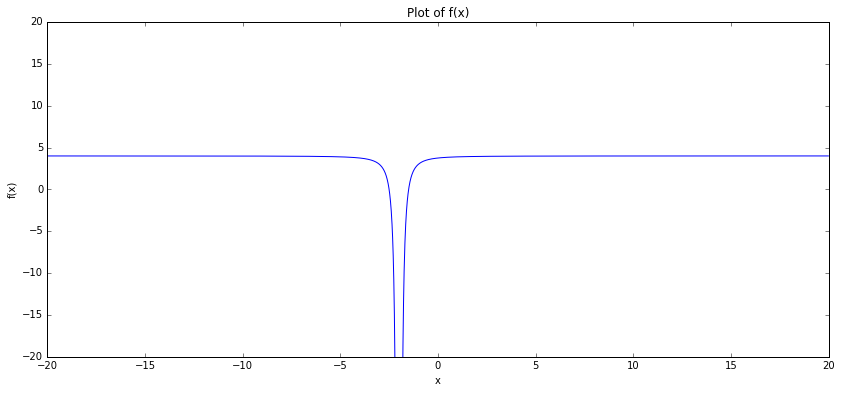

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    y = float(-1)/((x+2)**2) + 4
    return y

x = np.arange(-20,20,0.01)
y = f(x)

plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title("Plot of f(x)")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

####Domain

According to <a href = "https://en.wikipedia.org/wiki/Domain_of_a_function">wikipedia</a>, the domain of a function is the set of 'input' or argument values for which the function is defined.

In order to find the undefined points and thus find the domain, the denominator of the function $(x+2)^2$ must be set to zero and evaluated for all values of $x$. Any values of $x$ for which the denominator is evaluated as zero are excluded from the analysis.

In [11]:
from sympy import *

x = Symbol('x')
fd = (x + 2)**2
fd_e = solve(fd, x)
print("(x + 2)**2 = 0:", fd_e[0])

(x + 2)**2 = 0: -2


Since $(x+2)^2=0$ when $x=-2$, this value is excluded from the domain. As such, the domain of the function $f(x)$ is $(-\infty \:,\:-2)\cup (-2,\:\infty \:)$.

####Critical points

According to <a href = "https://en.wikipedia.org/wiki/Critical_point_%28mathematics%29">wikipedia</a>, a critical point of a differentiable function of a real or complex variable is any value in its domain where its derivative is zero or undefined.

As such, in order to find the critical points, the first derivative of the function $f(x)$ is found w.r.t $x$, and evaluated equal to zero. The first derivative of the function $f(x)$ is shown below w.r.t $x$.

In [12]:
from sympy import *

x = Symbol("x")
f = -1/((x + 2)**2) + 4
f_d_1 = f.diff(x)
print("d_1(f(x)):", f_d_1)

d_1(f(x)): 2/(x + 2)**3


A plot of the first derivative of the function $f(x)$ is shown below.

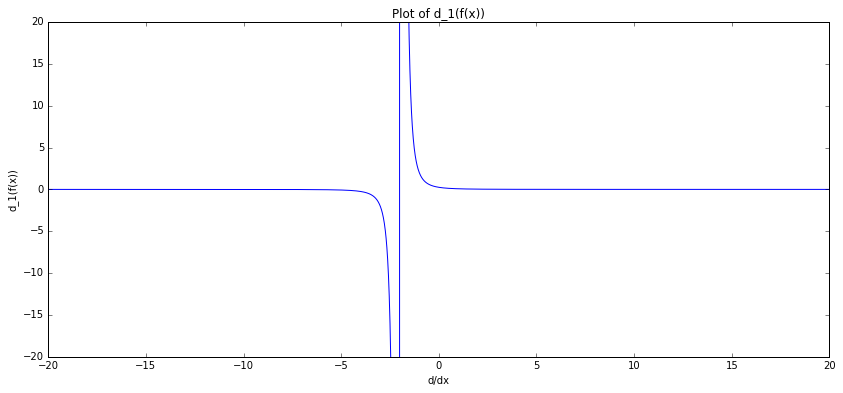

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    y = float(2)/(x + 2)**3
    return y

x = np.arange(-20,20,0.01)
y = f(x)

plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title("Plot of d_1(f(x))")
plt.ylabel("d_1(f(x))")
plt.xlabel("d/dx")
plt.show()

We then evaluate the first derivative equal to zero.

In [14]:
from sympy import *

x = Symbol('x')
f_d_1_e = solve(f_d_1, x)
print("d_1(f(x))=0:", f_d_1_e)

d_1(f(x))=0: []


For the function $f(x)$, there are no values of $x$ for which its first derivative is equal to zero. And therefore, there is no critical point solution.

####Intervals where the function is increasing or decreasing

In order to find the intervals where the function $f(x)$ is increasing or decreasing, the first derivative of the function is found and evaluated over all points of its domain. For intervals where the derivative is positive, the function is said to be increasing, and when the derivative is negative, the function is said to be decreasing. The below Python code performs a crude evaluation of the first derivative of the function $f(x)$ over a range of values of $x$, and labels each as increasing or decreasing.

In [15]:
import numpy as np
import pandas as pd

l_x = np.arange(-9999,9999,1)

def f(x):
    y = float(-1)/((x + 2)**2) + 4
    return y

def d_1(x):
    y = float(2)/(x + 2)**3
    return y

i = 0
l_y = []
for x in l_x:
    x = int(x)
    if x == -2:
        y = "NA"
        d = "NA"
    else:
        y = f(x)
        d = d_1(x)
    l_y.append([i, x, y, d])
    i += 1

for i in range(0, len(l_y)):
    if l_y[i][1] == -2:
        l = "NA"
    elif l_y[i][3] > 0:
        l = "I"
    elif l_y[i][3] < 0:
        l = "D"
    else:
        l = "E"
    l_y[i].append(l)

l_y_ranges = []
l_y_ranges.append(l_y[1])
l_y_ranges.append(["//", "//", "//", "//", "//"])
for i in range(0, len(l_y) - 1):
    if l_y[i][1] == -2:
        for j in range(-10, 10):
            l_y_ranges.append(l_y[i + j])
l_y_ranges.append(["//", "//", "//", "//", "//"])
l_y_ranges.append(l_y[-1])


resultcols = ["index",
              "x",
              "y",
              "d_1(f(x))",
              "increase(I)/decrease(D)"]

df_results = pd.DataFrame(l_y_ranges, columns = resultcols)
df_results = df_results.set_index("index")
df_results

,x,y,d_1(f(x)),increase(I)/decrease(D)
index,,,,
1,-9998,4,-2.0024e-12,D
//,//,//,//,//
9987,-12,3.99,-0.002,D
9988,-11,3.98765,-0.00274348,D
9989,-10,3.98438,-0.00390625,D
9990,-9,3.97959,-0.0058309,D
9991,-8,3.97222,-0.00925926,D
9992,-7,3.96,-0.016,D
9993,-6,3.9375,-0.03125,D


As it can be seen from the above dataframe. The original function is decreasing for those values of $x$ which lie to the left of -2 (over the assessed range), and increasing for those values of $x$ which lie to the right of this value (over the assessed range). The function does however seem to have a horizontal asymptote at a value of $y=4$, as suggested by the convergence of the derivative to zero as we extend further outwards from $x=-2$.

####Inflection points

According to <a href = "https://en.wikipedia.org/wiki/Inflection_point">wikipedia</a>, an inflection point is a point on a curve at which the curve changes from being concave (concave downward) to convex (concave upward), or vice versa.

In order to find any inflection points, the second derivative of the function $f(x)$ is found and evaluated equal to zero. The second derivative of the function $f(x)$ is shown below.

In [16]:
from sympy import *

x = Symbol("x")
f_d_2 = f_d_1.diff(x)
print("d_2(f(x)):", f_d_2)

d_2(f(x)): -6/(x + 2)**4


A plot of the second derivative of the function $f(x)$ is shown below.

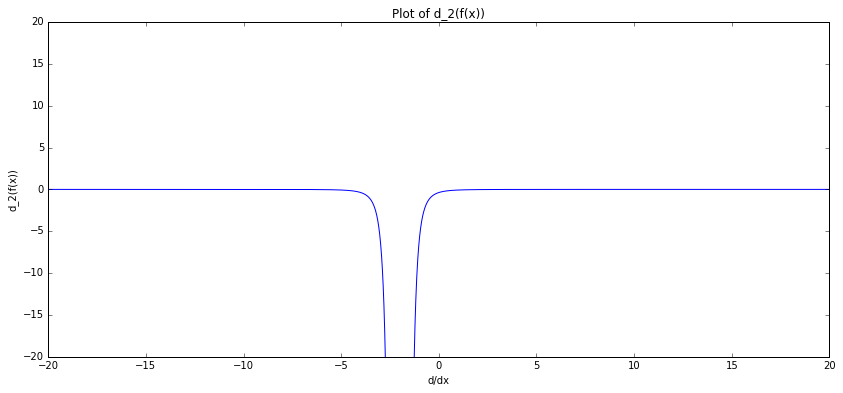

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    y = -float(6)/(x + 2)**4
    return y

x = np.arange(-20,20,0.01)
y = f(x)

plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title("Plot of d_2(f(x))")
plt.ylabel("d_2(f(x))")
plt.xlabel("d/dx")
plt.show()

We then evaluate the second derivative equal to zero.

In [18]:
from sympy import *

x = Symbol('x')
f_d_2_e = solve(f_d_2, x)
print("d_2(f(x))=0:", f_d_2_e)

d_2(f(x))=0: []


For the function $f(x)$, there are no values of $x$ for which the second derivative is equal to zero. As such, there are no inflection points.

####Intercepts

In order to find the intercepts of the function $f(x)$m, we simply substitute zero for the value of $x$ (to find the y-intercept), and evaluate the function for $x$ (to find the x-intercept).

In [19]:
from sympy import *

x = Symbol("x")
f = float(-1)/((x+2)**2) + 4
print("f(0) (y-intercept):", f.subs(x, 0))
print("f(x)=0 (x-intercept):", solve(f, x))

f(0) (y-intercept): 3.75000000000000
f(x)=0 (x-intercept): [-2.50000000000000, -1.50000000000000]


As such, the function $f(x)$ has a y-intercept at $\frac{15}{4}$, and x-intercepts at $\frac{-5}{2}$ and $\frac{-3}{2}$.

####Asymptotes

According to <a href = "https://en.wikipedia.org/wiki/Asymptote">wikipedia</a>, an asymptote of a curve is a line such that the distance between the curve and the line approaches zero as they tend to infinity.

In order to identify the existence of vertical asymptotes, we must go over every undefined point $x=a$ and check if at least one of the following statements is true:

$\lim _{x\to a^-}f(x)=\pm \infty$

$\lim _{x\to a^+}f(x)=\pm \infty$

We can test for the existence of a vertical asymptote at $x=-2$ (the value which we excluded from our domain) by checking whether $\lim _{x\to \:-2-}(-\frac{1}{(x+2)^2}+4) = \pm \infty$.

In [20]:
from sympy import *

x = Symbol("x")
f = float(-1)/((x+2)**2) + 4
print("limit(f(x), x, -2):", limit(f, x, -2))

limit(f(x), x, -2): -oo


Therefore, there is a vertical asymptote at $x=-2$.

In order to identify the existence of non-vertical asymptotes, we must check if at $x \to \pm \infty$ the original function $f(x)$ behaves as a line $y=mx+b$.

We can compute $\lim _{x\to -\infty \:}\frac{f\left(x\right)}{x}$ to find $m$.

In [21]:
from sympy import *

x = Symbol("x")
f = (float(-1)/((x + 2)**2) + 4)/x
print("limit(f(x)/x, x, oo):", limit(f, x, oo))

limit(f(x)/x, x, oo): 0


And compute $\lim _{x\to -\infty \:}f(x)-mx$ to find $b$:

In [22]:
from sympy import *

x = Symbol("x")
f = float(-1)/((x+2)**2) + 4
print("limit(f(x)-mx, x, oo):", limit(f, x, oo))

limit(f(x)-mx, x, oo): 4


Therefore, there is a horizontal asymptote at $y=4$.

###Question 7

The rate of growth of the profit (in millions) from an invention is approximated by the function $P'(x)=xe^{-x^2}$ where $x$ represents time measured in years.  The total profit in year 2 that the invention is in operation is $25,000.  Find the total profit function.  Round to three decimals where appropriate.

####Answer

As stated by the question, the rate of change of total profit (marginal profit) is expressed as $P'(x)=xe^{-x^2}$. In order find the total profit function, we must integrate the marginal profit function w.r.t $x$.

In [23]:
from sympy import *

x = Symbol("x")
d_1 = 1.0*x*exp(-x**2)
d_1_i = integrate(d_1, x)
print(d_1_i)

-0.5*exp(-x**2)


We then add the constant function $C$ providing, $P(x)=-\frac{1}{2}e^{-x^2}+C$, which we must solve for.

Since original function expresses the rate of growth of profit in millions, $P(x)=0.025$ when $x=2$.

As such,

$P(2)=-\frac{1}{2}e^{-(2)^2}+C$

$0.025=-\frac{1}{2}e^{-4}+C$

$C=0.034$

Therefore, the total profit function is, $P(x)=-\frac{1}{2}e^{-x^2}+0.034$

###Question 8

For a certain drug, the rate of reaction in appropriate units is given by

$R' (t)=\frac{6}{(t+1)}+\frac{1}{\sqrt{t+1}}$

where $t$ is time (in hours) after the drug is administered. Find the total reaction to the drug from 1 to 8 hours after it is administered.

####Answer

In order to find the total reaction to the drug from one to eight hours, we must integrate the rate of reaction function $R'(t)$ over this range.

In [24]:
from sympy import *

t = Symbol("t")
f = float(6)/(t+1) + float(1)/sqrt(t+1)
f_i18 = integrate(f, (t, 1, 8))
f_i18_e = f_i18.evalf()
print("Total reaction to drug from 1 to 8 hours:", format(f_i18_e, ".6f"))

Total reaction to drug from 1 to 8 hours: 12.196037


###Question 9

Show that the following function is a probability density function (PDF) on $[0,∞)$.  

$f(x)= \begin{cases} \frac{x^{3}}{8},0 \le x \le 2 \\ \frac{4}{x^{3}},x \gt 2 \end{cases}$

Determine $P(1 \le x \le 5)$.

####Answer

The PDF of a continuous random variable $X$ is an integrable function $f(x)$ when the following are satisfied:

- $f(x)$ is positive everywhere, that is, $f(x) \gt 0$, for all $x$.

- The area under the curve $f(x)$ is equal to 1.

Checks for violation of these assumptions are performed below.

In [25]:
def f(x):
    if x < 0:
        return 0
    elif x >= 0 and x <= 2:
        return float(x)**3/8
    else:
        return float(4)/x**3
    
xmin = -9999 
xmax = 9999
l_f = []
for x in np.arange(xmin, xmax, 0.1):
    x = int(x)
    l_f.append(f(x))

if all( type(x) >= 0 for i in l_f ):
    print("f(x) is positive everywhere over x range (", xmin, xmax, ")")
else:
    print("f(x) is NOT positive everywhere over x range (", xmin, xmax, ")")

f(x) is positive everywhere over x range ( -9999 9999 )


In [26]:
from sympy import *

def f1(x):
    return x**3/8

def f2(x):
    return 4/x**3

x = Symbol("x")
a = integrate(f1(x), (x, 0, 2)).evalf()
b = integrate(f2(x), (x, 2, oo)).evalf()
f_i0inf = a + b

if f_i0inf == 1:
    print("The area under the curve f(x) is equal to 1")
else:
    print("The area under the curve f(x) is NOT equal to 1")

The area under the curve f(x) is equal to 1


The defined PDF is shown in the plot below for the X range of 0 to 10.

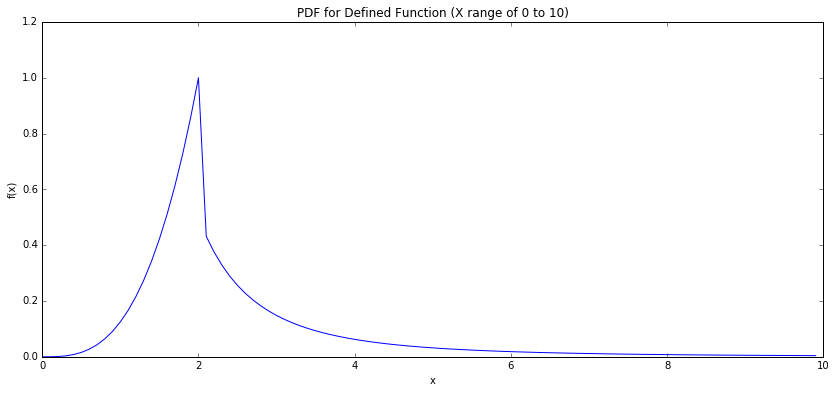

In [27]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    if x < 0:
        return 0
    elif x >= 0 and x <= 2:
        return float(x)**3/8
    else:
        return float(4)/x**3

y = []
x = []
for i in np.arange(0,10,0.1):
    s = f(i)
    y.append(s)
    x.append(i)

plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.xlim(0,10)
plt.ylim(0,1.2)
plt.title("PDF for Defined Function (X range of 0 to 10)")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

For the PDF of a continuous random variable, it must hold that the probability that x belongs to A, where A is some interval, is given by the integral of $f(x)$ over that interval. As such, to determine $P(1 \le x \le 5)$, the defined PDF must be integrated over the range 1 to 5.

In [28]:
from sympy import *

def f1(x):
    return x**3/8

def f2(x):
    return 4/x**3

x = Symbol("x")
a = integrate(f1(x), (x, 1, 2)).evalf()
b = integrate(f2(x), (x, 2, 5)).evalf()

print("P(1<=x<=5):", format(a + b, ".6f"))

P(1<=x<=5): 0.888750


###Question 10

Researchers have shown that the number of successive dry days that occur after a rainstorm for a particular region is a random variable that is distributed exponentially with a mean of 9 days.  Using Python, determine the (separate) probabilities that 13 or more successive dry days occur after a rainstorm, and fewer than 2 dry days occur after a rainstorm.

####Answer

According to <a href = "https://en.wikipedia.org/wiki/Exponential_distribution">wikipedia</a>, we know that the exponential distribution function is defined by:

$f(x)=\lambda e^{-\lambda x}$

for $x$ in $[0,\infty)$.

Also, according to the same source, the mean of an exponentially distributed random variable with rate parameter $\lambda$ is given by:

$\mu = \frac{1}{\lambda}$

Since, $\mu = 9$, and $\mu = \frac{1}{\lambda}$, then $\lambda = \frac{1}{9}$.

As such, the probability density function for this problem is defined by:

$f(x) = \frac{1}{9} e^{\frac{-x}{9}}$

In [29]:
from sympy import *

x = Symbol("x")
f = float(1)/9*exp(-x/9)

In order to find the probability that 13 or more successive days occur after a rainstorm, we must integrate the above PDF over the X range of 13 to $\infty$.

In [30]:
from sympy import *

f_i13inf = integrate(f, (x, 13, oo))
f_i13inf_e = f_i13inf.evalf()
print("P(X>=13):", format(f_i13inf_e, ".6f"))

P(X>=13): 0.235877


In order to find the probability that fewer than two dry days occur after a rainstorm, we must integrate the above PDF over the X range of 0 to 2.

In [31]:
from sympy import *

f_i02 = integrate(f, (x, 0, 2))
f_i02_e = f_i02.evalf()
print("P(X<2):", format(f_i02_e, ".6f"))

P(X<2): 0.199263
